In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing libraries


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

#for loading and visualizing audio files
import librosa
import librosa.display
import matplotlib.pyplot as plt
#to play audio
import IPython.display as ipd

Analyzing the number of files

In [3]:
audio_fpath = "/content/gdrive/MyDrive/16000/1-100210-A-36.wav"
# audio_clips = os.listdir(audio_fpath)
# print("No. of .wav files in audio folder = ",len(audio_clips))

In [22]:
audio_path = "/content/gdrive/MyDrive/train/train/tb_1/1624950704541-recording-1.wav"
audio_path1 = "/content/gdrive/MyDrive/train/train/tb_0/1620627491038-recording-1.wav"
audio_path2 = "/content/gdrive/MyDrive/train/train/tb_1/1633397090133-recording-1.wav"

In [5]:
x, sr = librosa.load(audio_path, sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(22050,) 44100


In [25]:
x

array([-0.02017212, -0.04110718, -0.03665161, ...,  0.0062561 ,
        0.00616455,  0.00628662], dtype=float32)

In [6]:
ipd.Audio(audio_path)

In [23]:
ipd.Audio(audio_path1)

In [8]:
ipd.Audio(audio_path2)

<ipython-input-9-05929e8266d9>:3: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(data1,sr=sample_rate1, max_points=50000, x_axis='time')


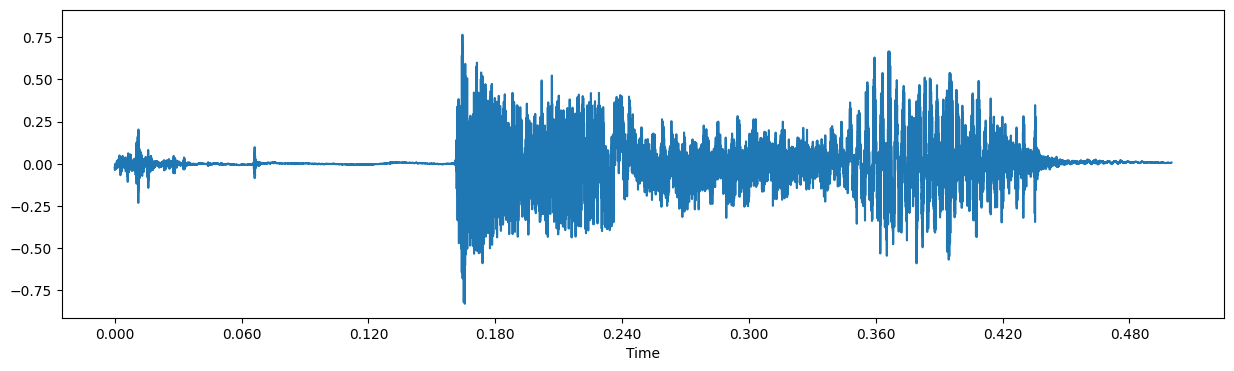

In [9]:
plt.figure(figsize=(15,4))
data1,sample_rate1 = librosa.load(audio_path, sr=22050, mono=True, offset=0.0, duration=50)
librosa.display.waveshow(data1,sr=sample_rate1, max_points=50000, x_axis='time')

<ipython-input-58-d9eeb200510c>:3: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(data1,sr=sample_rate1, max_points=50000, x_axis='time',color='r')


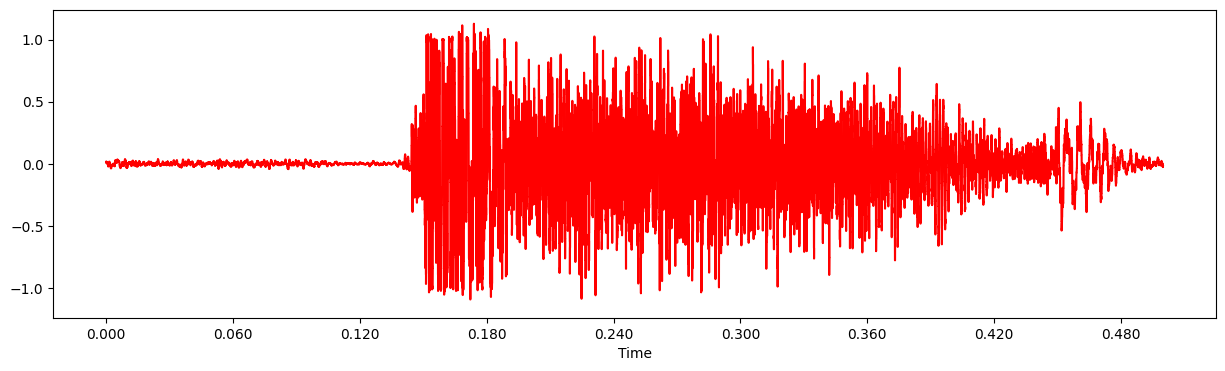

In [58]:
plt.figure(figsize=(15,4))
data1,sample_rate1 = librosa.load(audio_path1, sr=22050, mono=True, offset=0.0, duration=50)
librosa.display.waveshow(data1,sr=sample_rate1, max_points=50000, x_axis='time',color='r')

<ipython-input-59-abafed6a9e0f>:3: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(data2,sr=sample_rate2, max_points=50000, x_axis='time',color ='g')


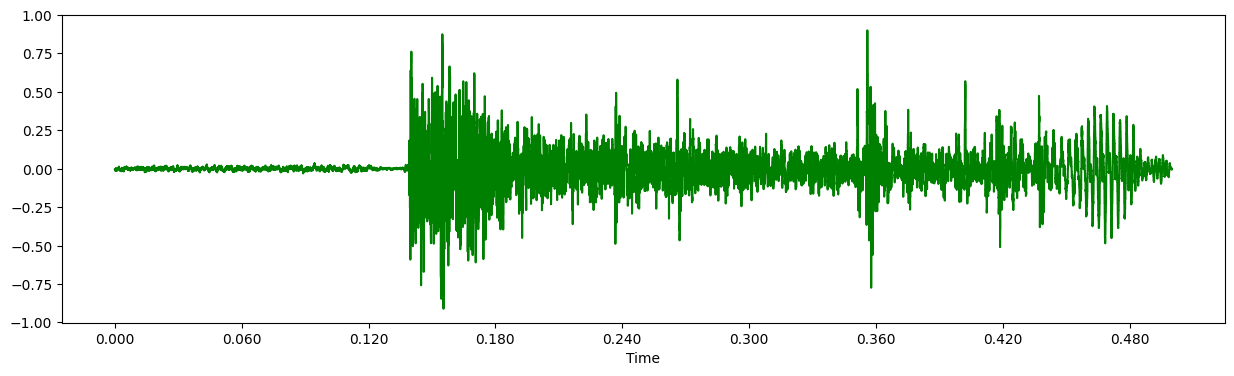

In [59]:
plt.figure(figsize=(15,4))
data2,sample_rate2 = librosa.load(audio_path2, sr=22050, mono=True, offset=0.0, duration=50)
librosa.display.waveshow(data2,sr=sample_rate2, max_points=50000, x_axis='time',color ='g')

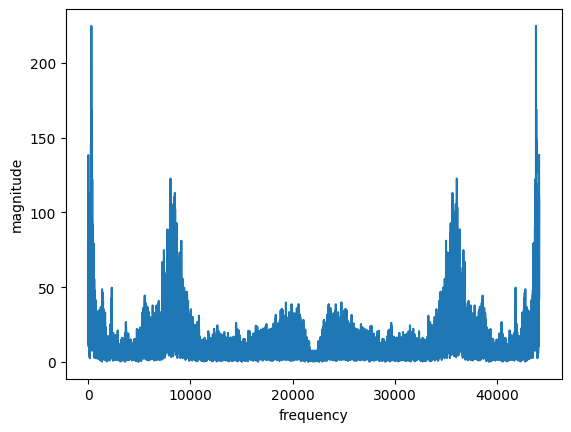

In [12]:
fft = np.fft.fft(x)
magnitude = np.abs(fft) #Absolute values on the complex values and the magnitude indicates overall frequency contribution to the wave
frequency = np.linspace(0,sr,len(magnitude)) #return evenly spaced numbers over an interval
plt.plot(frequency,magnitude)
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.show()
#Power spectrum, higher frequency less energy

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=500
  warnings.warn(


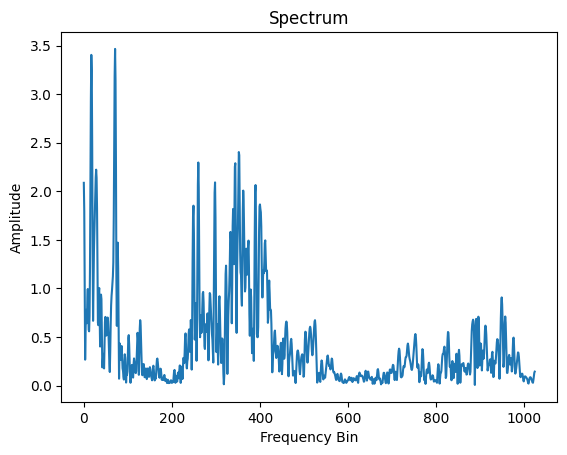

In [13]:
import numpy as np
n_fft = 500
ft = np.abs(librosa.stft(x[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

(40, 22)


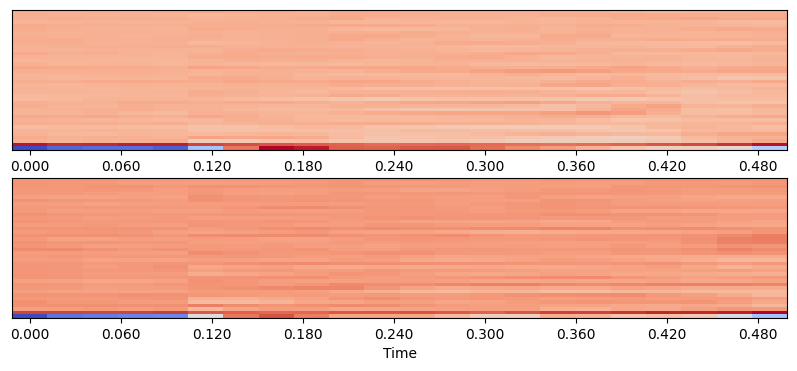

In [61]:
mfccs = librosa.feature.mfcc(y=data1, sr=sample_rate1, n_mfcc=40)
mfccs1 = librosa.feature.mfcc(y=data2, sr=sample_rate2, n_mfcc=40)

print(mfccs.shape)
plt.figure(figsize=(10,4))
ax = plt.subplot(2, 1, 1)
librosa.display.specshow(mfccs, x_axis="time")

plt.subplot(2,1,2)
librosa.display.specshow(mfccs1, x_axis="time")


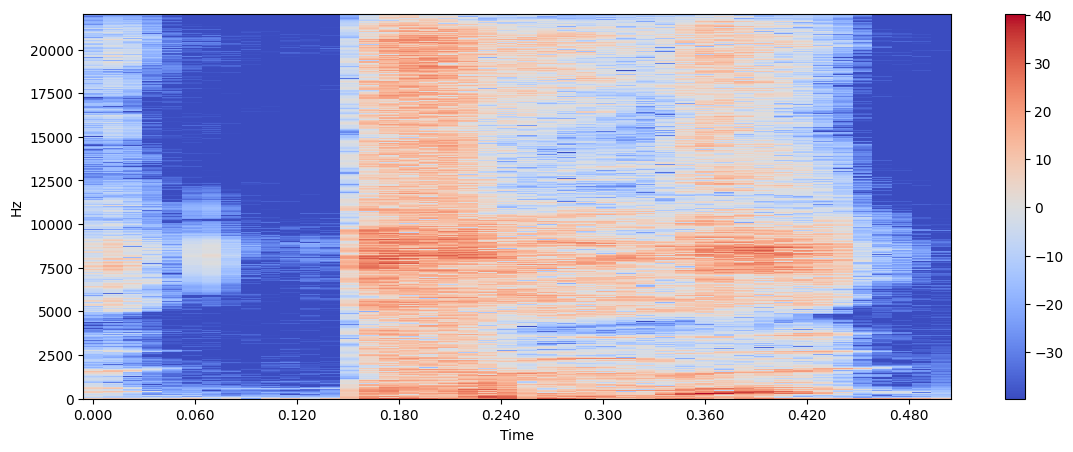

In [14]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

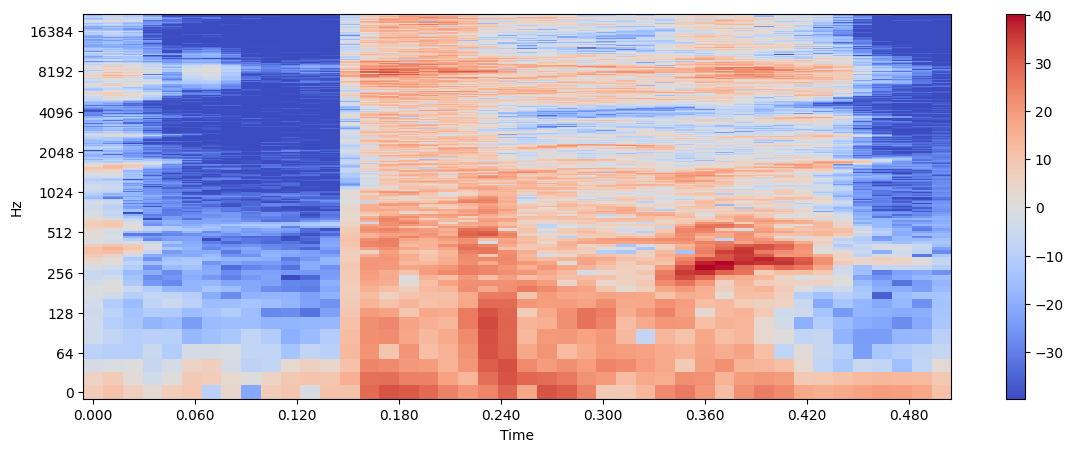

In [15]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

Pre-processing methods

  1. Zero crossing rate
  2. Spectral centroid
  

Zero crossing

(10000,)

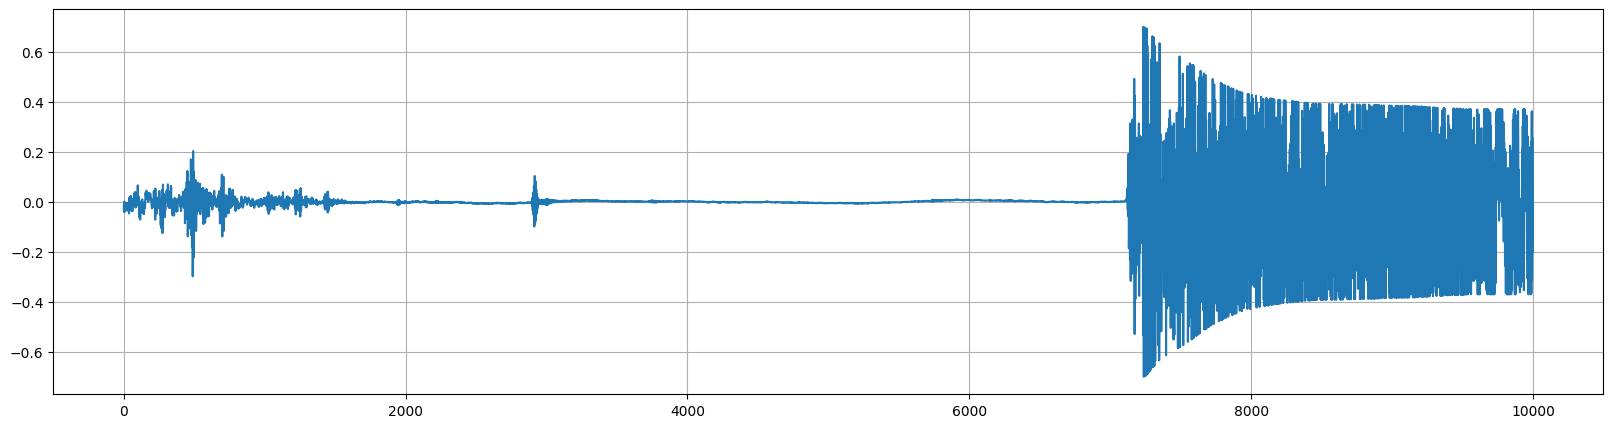

In [16]:
n0 = 0
n1 = 10000
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape
#The number times over a given interval that the signal’s amplitude crosses a value of zero

Spectral Centroid 

[Text(0.5, 1.0, 'log Power spectrogram')]

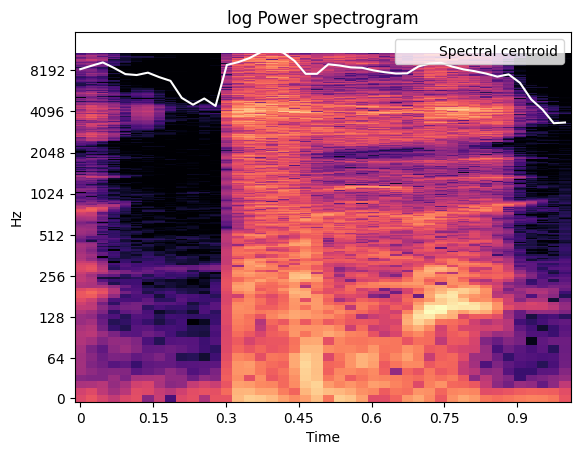

In [65]:
sc= librosa.feature.spectral_centroid(y=x, sr=sr)
frames = range(len(sc)) #split into different time frames
times = librosa.times_like(sc)
S, phase = librosa.magphase(librosa.stft(y=x))
librosa.feature.spectral_centroid(S=S)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, sc.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')


High-pass filtering method - High-pass filters remove low-frequency (slow) noise and pass high-freqency signals.

In [18]:
from scipy import signal
import random


def f_high(y,sr):
    b,a = signal.butter(10, 2000/(sr/2), btype='highpass')
    yf = signal.lfilter(b,a,y)
    return yf

In [19]:
yf = f_high(x,sr)

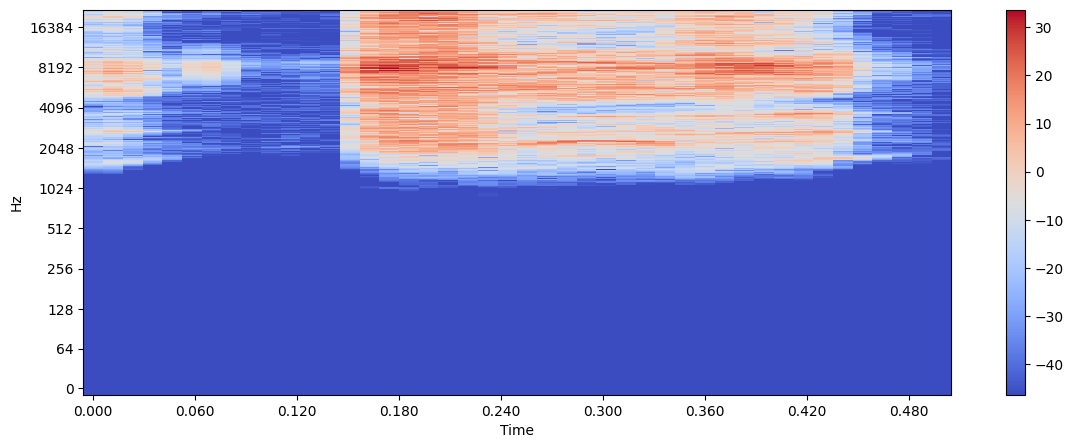

In [20]:
X = librosa.stft(yf)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [21]:
from IPython.display import Audio, IFrame, display
display(Audio(yf, rate=sr))